In [1]:
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import numpy as np

# ***NOTE:*** in the paper this is tested with v0.1.1, future versions may behave slightly different
from invexpo.inverse_exponential import InverseExponential

In [94]:
theoretical = InverseExponential()
theoretical.create(a = 0.007, lower_bound = 300, upper_bound = 900)

(array([ 324.,  241.,  433.,  468.,  629.,  845., 1044., 1481., 1953.,
        2582.]),
 array([414.91644875, 456.32302492, 497.72960109, 539.13617726,
        580.54275342, 621.94932959, 663.35590576, 704.76248192,
        746.16905809, 787.57563426, 828.98221043]),
 <BarContainer object of 10 artists>)

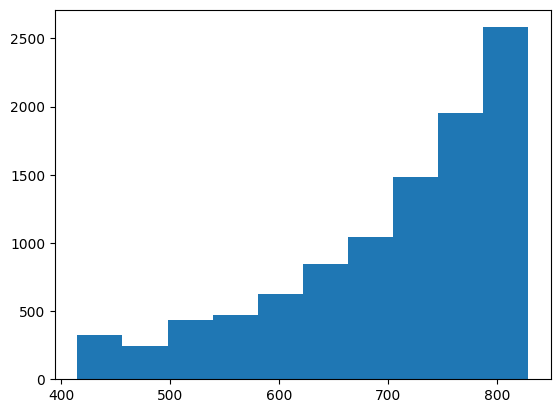

In [93]:
tsample = theoretical.rvs(10000)
plt.hist(tsample)

In [95]:
# symmetric KL-Divergence as described in the paper
def symmetric_kld(dist):
    domain = np.linspace(300, 900, 1000)
    _sum = 0.0
    for _x in domain:
        _sum += (dist.pdf(_x)*np.log(dist.pdf(_x)/theoretical.pdf(_x)) + theoretical.pdf(_x)*np.log(theoretical.pdf(_x)/dist.pdf(_x)))
    return _sum

In [96]:
# counts[0] = number of times fhat was a "better" fit
# counts[1] = number of times KDE was a "better" fit
counts = [0, 0]
fhat_kld_values = []
khat_kld_values = []

# 250 total experiments
# NOTE: the 0-th iteration is a burn in because it errors out when
# taking the average of an empty list but too lazy to fix that.
for i in range(251):
    print(i, counts, [np.mean(fhat_kld_values), np.mean(khat_kld_values)])
    # sometimes for small values of a (< 0.003) there are convergence issues
    # on small samples (e.g., 30). Without breaking the simulation, just re-try a new sample
    # to get the full 250 iterations
    while True:
        # sample 150 items from the theoretical distribution
        samples = theoretical.rvs(150)
        try: 
            # estimate the inverse exponential
            fhat = InverseExponential()
            fhat.fit(samples)
            # kernel density
            khat = gaussian_kde(samples)
        
            fhat_kld = symmetric_kld(fhat)
            khat_kld = symmetric_kld(khat)
            
            fhat_kld_values.append(fhat_kld)
            khat_kld_values.append(khat_kld)
        
            if fhat_kld < khat_kld:
                counts[0] += 1
            elif khat_kld < fhat_kld:
                counts[1] += 1
            else:
                print("WARNING: KLD values matched, doing nothing")
            break
        except:
            print("WARNING: invexpo didn't converge, retrying a new sample...")
            continue
    

0 [0, 0] [nan, nan]
1 [1, 0] [0.7286536034881791, 1.3782835815716097]
2 [2, 0] [0.6870785696151372, 1.2463866608815093]
3 [3, 0] [0.6587942759254047, 1.327865353274697]
4 [4, 0] [0.6361661003020265, 1.4017421352813484]
5 [5, 0] [0.6421460269183166, 1.3994690190010421]
6 [6, 0] [0.6463573857835734, 1.4030580832170187]
7 [7, 0] [0.6339279824702683, 1.3749721186294805]
8 [8, 0] [0.6237857770607933, 1.3707409670051791]
9 [9, 0] [0.6146740912197659, 1.3761149430266595]
10 [10, 0] [0.6330784114684166, 1.3874797119051805]
11 [11, 0] [0.6332515259878444, 1.397476081838984]
12 [12, 0] [0.6287723591245269, 1.3983984325908632]
13 [13, 0] [0.6273449881975932, 1.4170429818878156]
14 [14, 0] [0.6307011380562412, 1.4168680018912858]
15 [15, 0] [0.6258564605475316, 1.4315892685859708]
16 [16, 0] [0.6220449626974778, 1.41768823471703]
17 [17, 0] [0.6331347506042636, 1.4156446493638015]
18 [18, 0] [0.6278662851540152, 1.4173776534618296]
19 [19, 0] [0.6262656955166992, 1.404113559352806]
20 [20, 0] [0.6

In [97]:
# % improvement (negative is better, positive is worse)
(np.mean(fhat_kld_values) - np.mean(khat_kld_values)) / np.mean(khat_kld_values)

-0.5568601307159704